<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [153]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'





In [321]:
sat_filepath = '/Users/roshkhadka/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [322]:
v = open(sat_filepath, 'r')
data = [row.strip().split(',') for row in v]
sat_dict = {row[0]:row[1:] for row in zip(*the_data)}
print sat_dict


{'Math': ('510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'), 'State': ('CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'), 'Rate': ('82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 


### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [323]:
sat=pd.read_csv(sat_filepath)
sat.dtypes





State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [328]:
sat.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

# SAT DataFrame

    - State: Contains the list of States in the United States
        -dtype: Object
    - Rate: Overall rating in the States
        -dtype: int64
    - Verbal: The verbal score for the given state
        -dtype: int64
    - Math: The math score for the given state
        -dtype: int64
       


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

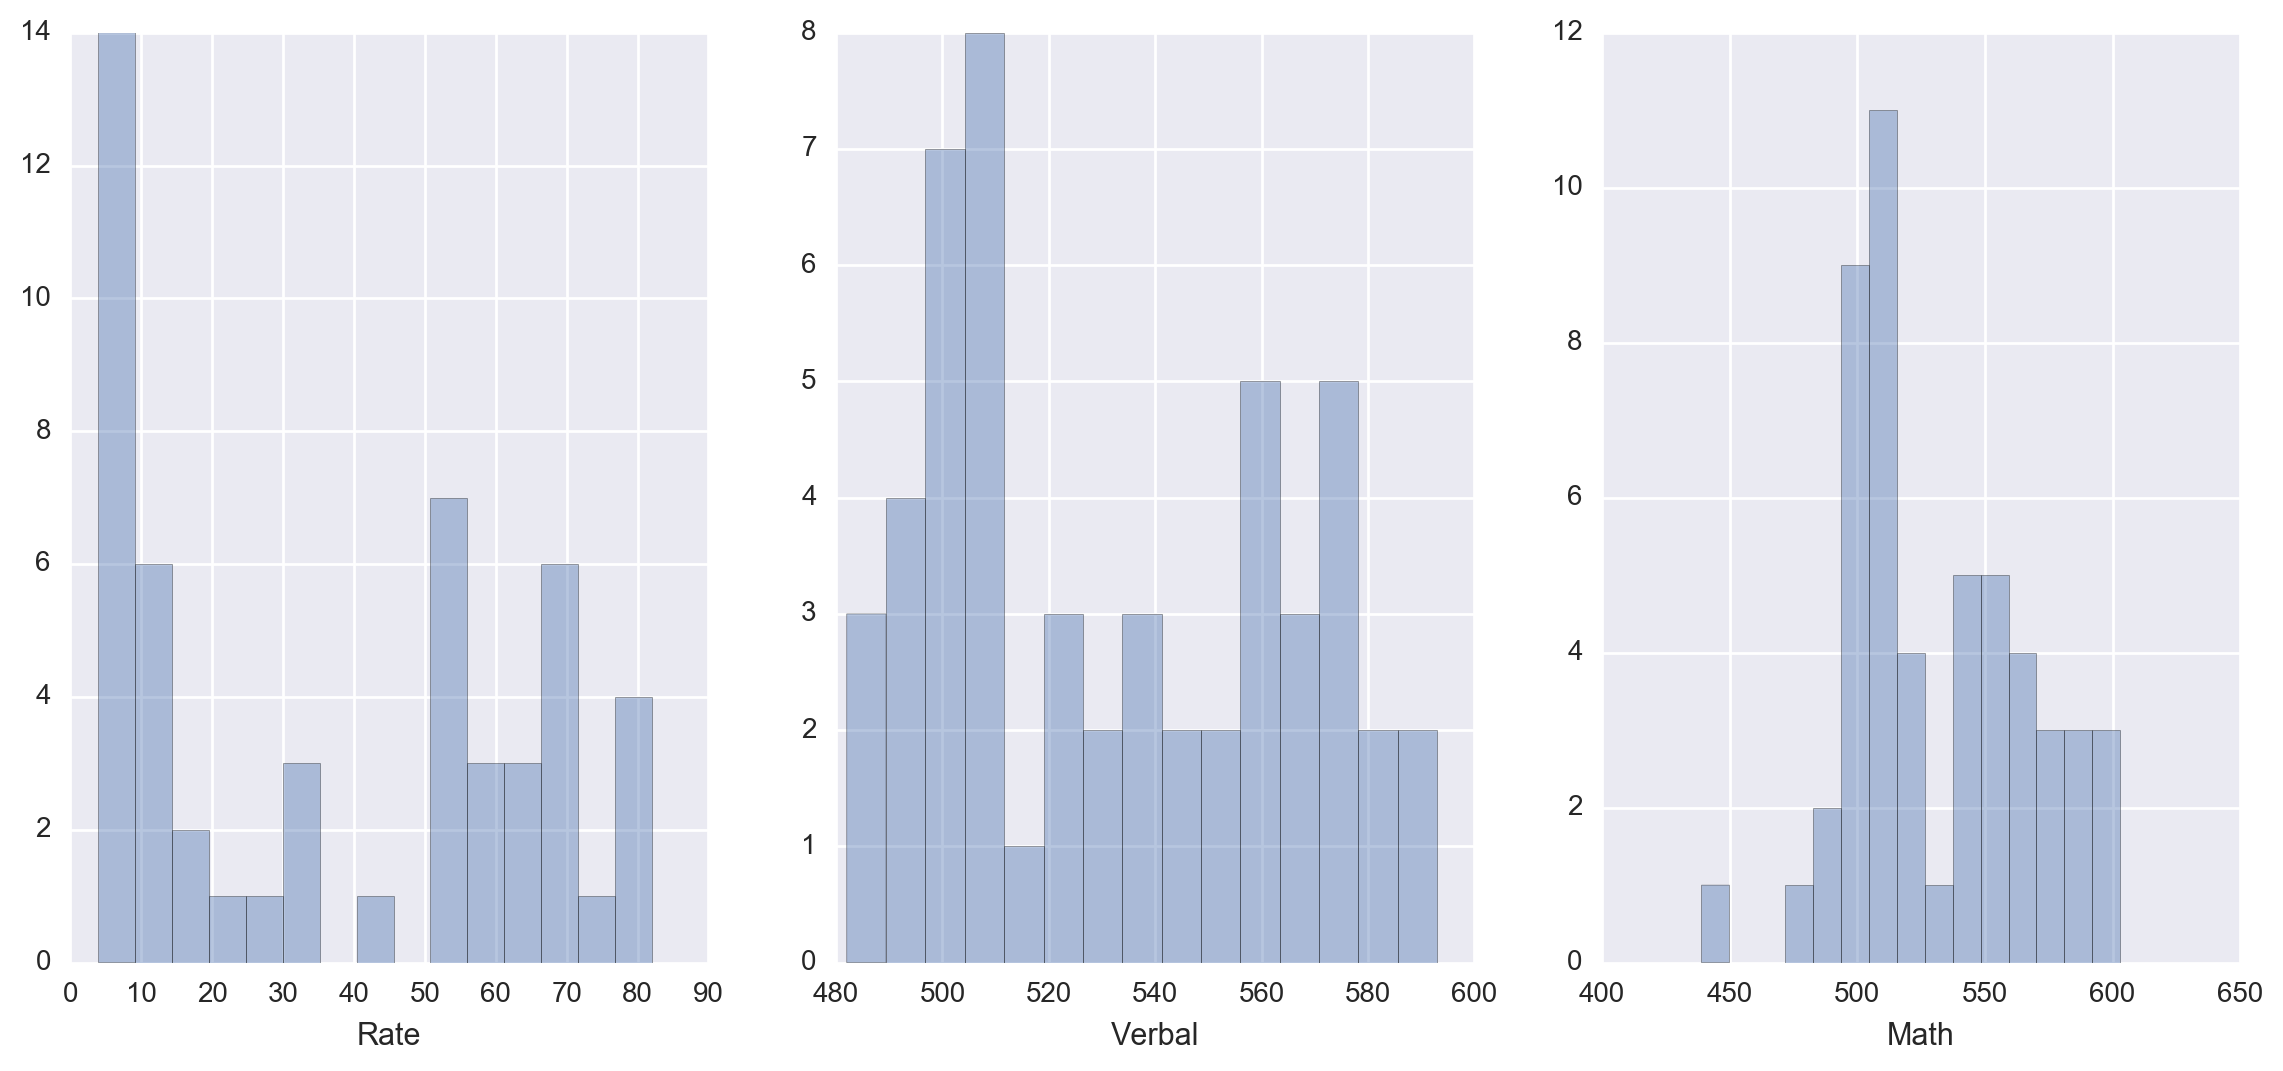

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axis_array = plt.subplots(1,3, figsize=(14,6))

axis1, axis2, axis3 = axis_array[0],axis_array[1], axis_array[2]

axis1 = sns.distplot(sat.Rate, ax = axis1,kde=False, bins=15)

axis2 = sns.distplot(sat.Verbal, ax=axis2, kde=False,bins=15)

axis3 = sns.distplot(sat.Math, ax=axis3, kde=False, bins=15)

# fig = plt.figure(figsize=(6,6))

# ax = sns.distplot(sat.Rate, kde=False, bins=10, ax=0)

# ax = sns.distplot(sat.Math, kde=False, ax=ax+1)



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [343]:
Rate has a negative correlation with math and verbal scores.
Math Score and Verbal Score as expected have a positive correlation. People who are well prepared are likely to do
good in both the sections. However there might be some cases where some students are indeed better at one subject 
then the other.


SyntaxError: invalid syntax (<ipython-input-343-2f175d59a7ec>, line 1)

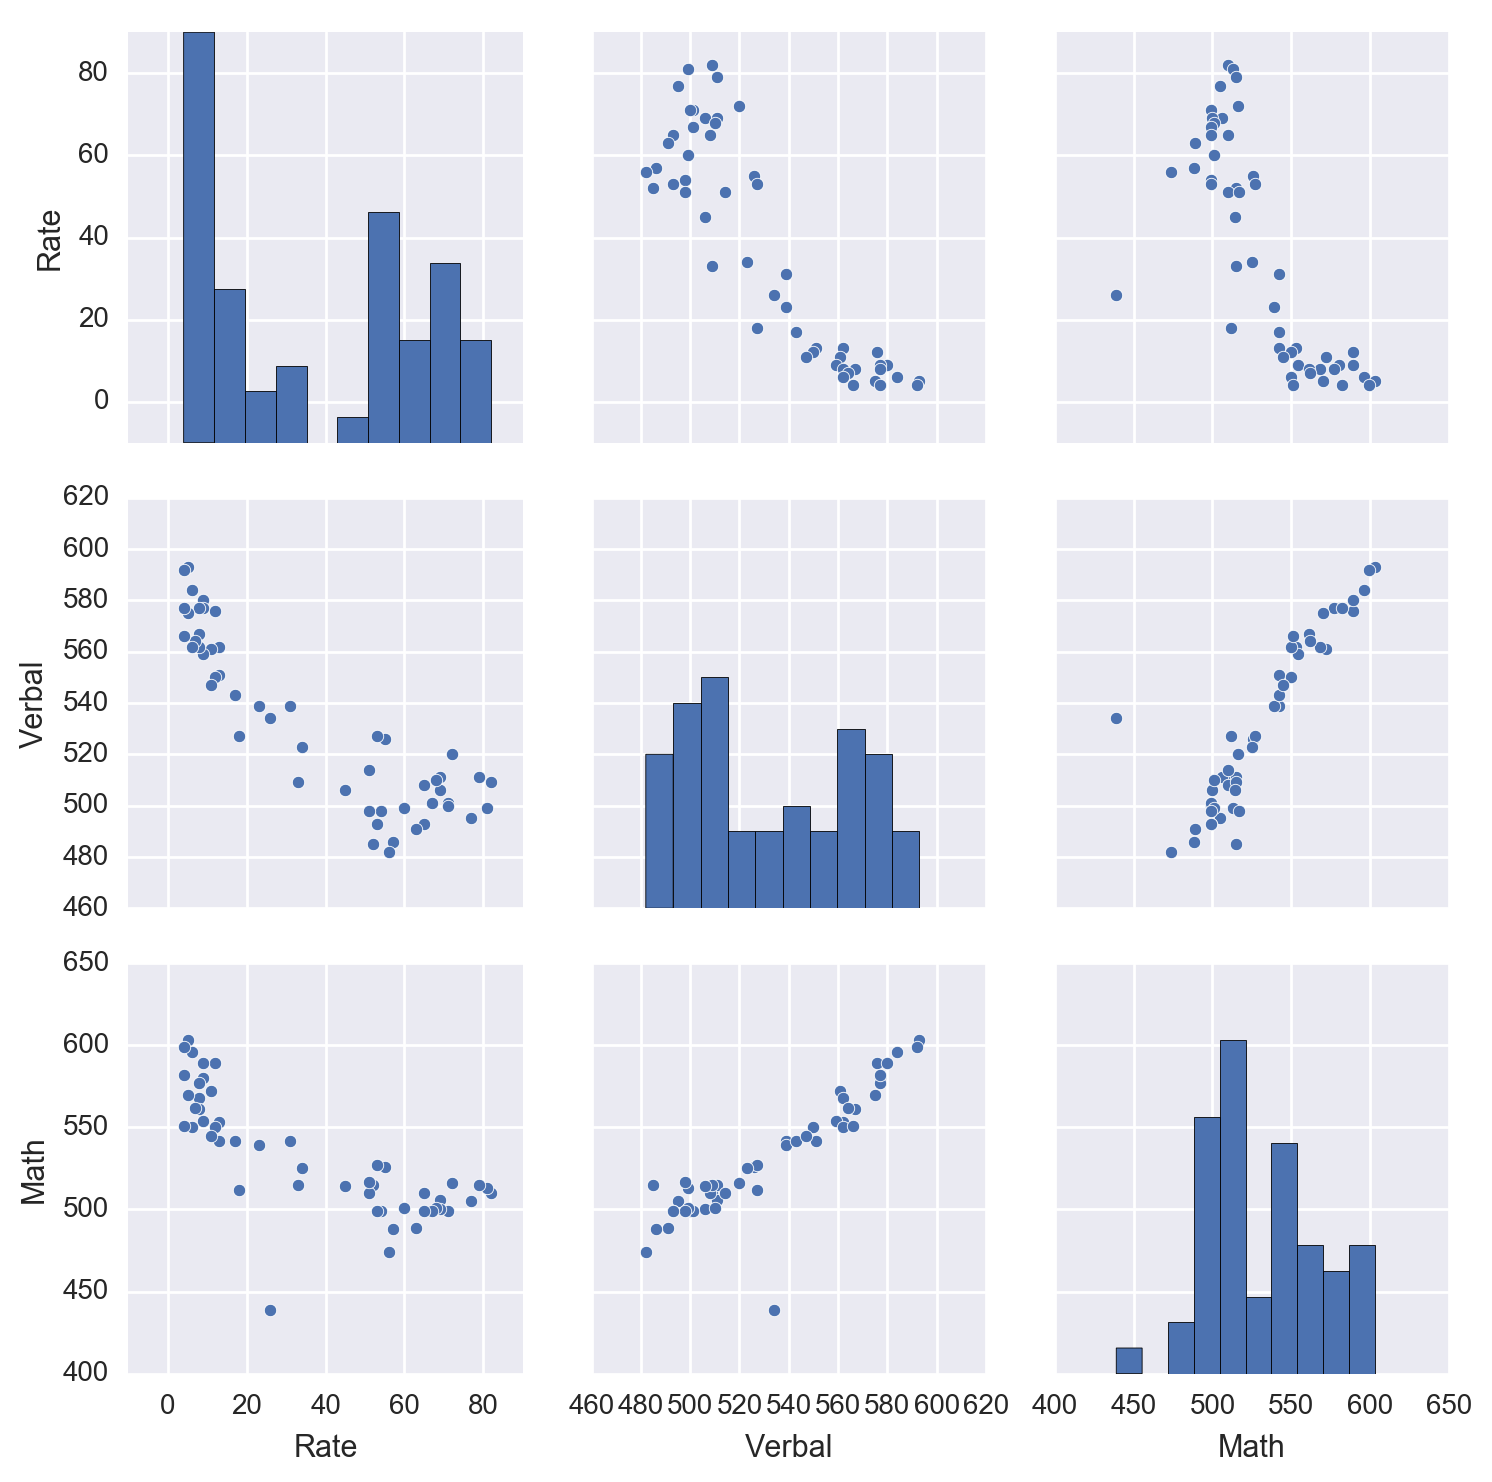

In [344]:
sns.pairplot(sat)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

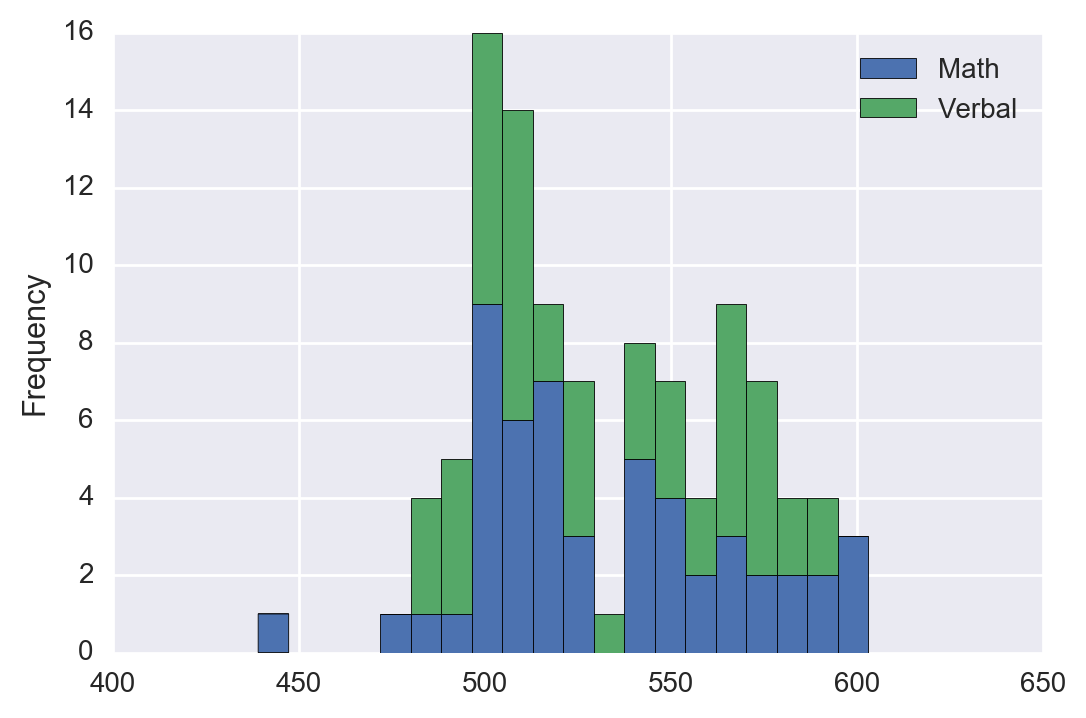

In [345]:
df = sat[['Math','Verbal']]
df.plot.hist(stacked=True, bins=20)




### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?


The box plot is a good way to see the range of the dataset. A boxplot helps us visualize a dataset based on its
minimum, fist quartile(from the standardized distribution), median, third quartile(also from the standardized distribution) and the maximum being the top line.

Rate is based on a different scale compared to Math and Verbal. We would not be able to make much sense out of the graph comparing rate along side Math and Verbal. In order to do so we would have to normalize the three datasets.


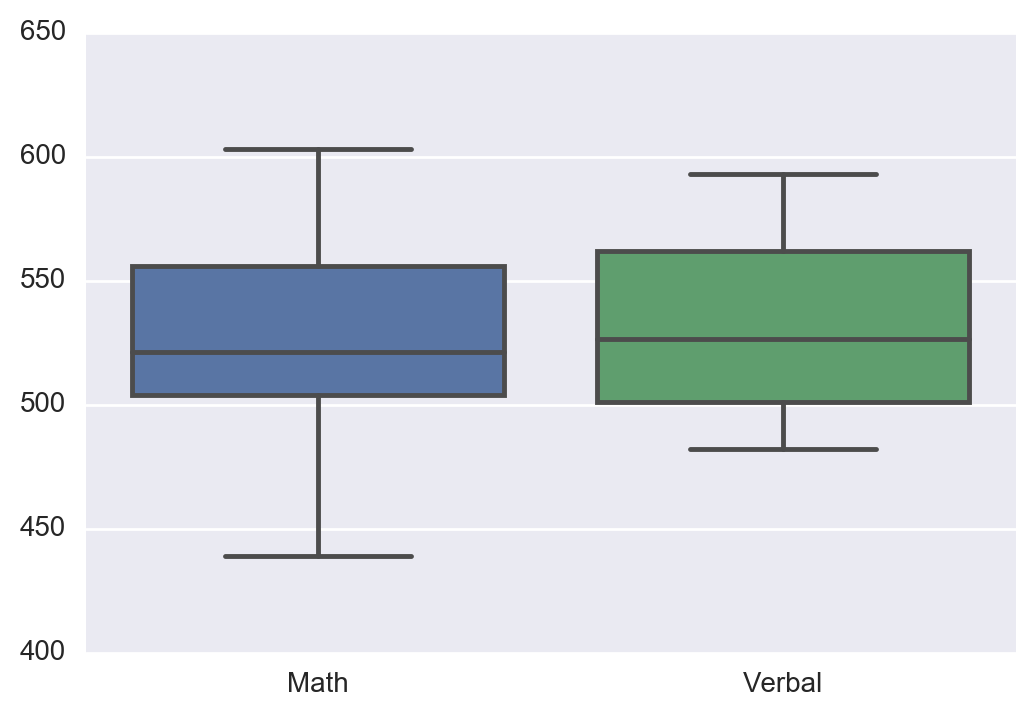

In [346]:
sns.boxplot(x=df)



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


       Rate      Math    Verbal
0  1.000000  0.432927  0.243243
1  0.987179  0.451220  0.153153
2  0.961538  0.463415  0.261261
3  0.935897  0.402439  0.117117
4  0.871795  0.469512  0.342342


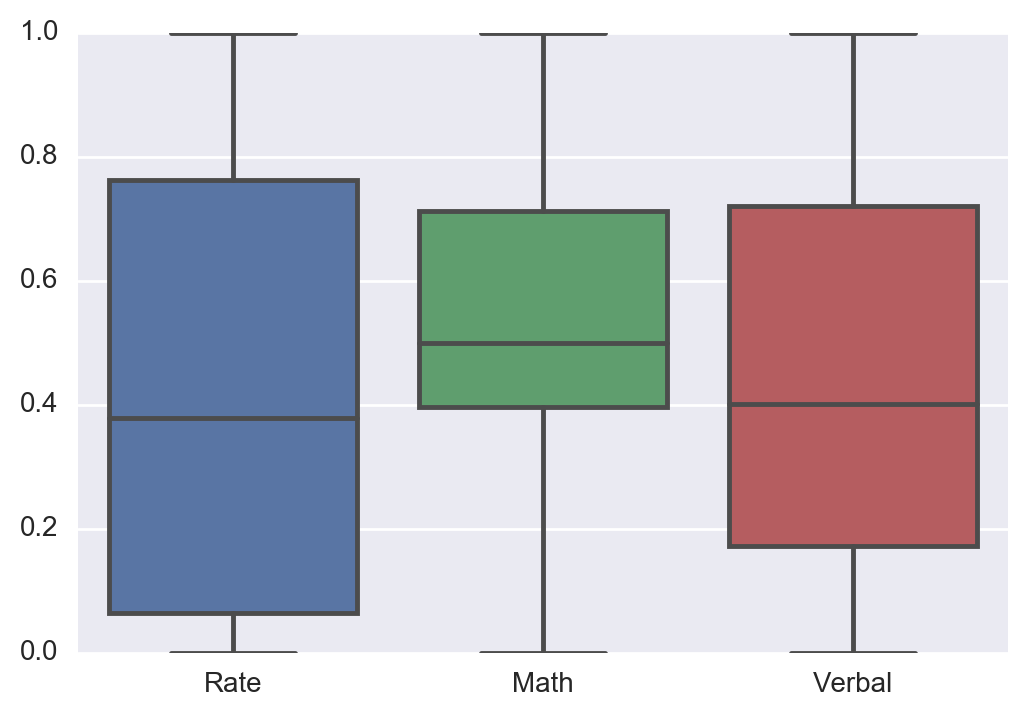

In [367]:
normal = pd.DataFrame()
normal['Rate'] = (sat['Rate']-min(sat['Rate']))/(max(sat['Rate'])-min(sat['Rate']))
normal['Math'] = (sat['Math']-min(sat['Math']))/(max(sat['Math'])-min(sat['Math']))
normal['Verbal'] = (sat['Verbal']-min(sat['Verbal']))/(max(sat['Verbal'])-min(sat['Verbal']))
print normal.head()


df = normal[['Rate','Math','Verbal']]
sns.boxplot(x=df)





<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [369]:
mean_verbal = sat['Verbal'].mean()
verb_high = sat[sat['Verbal']>mean_verbal]
list_states = verb_high['State']
list_states


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [373]:
mean_verbal = sat['Verbal'].median()
verb_high = sat[sat['Verbal']>mean_verbal]
list_states = verb_high['State']
list_states


19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [261]:
sat['diff_verb_math'] = sat['Verbal'] - sat['Math']



### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [165]:
sorted_verbal_greater_math = sat.sort_values('diff_verb_math', ascending = False).head(10)
print sorted_verbal_greater_math.head(3)
sorted_math_greater_verbal = sat.sort_values('diff_verb_math', ascending = True).head(10)
print sorted_math_greater_verbal.head(3)

   State  Rate  Verbal  Math  diff_verb_math
27    OH    26     534   439              95
50    MS     4     566   551              15
29    WV    18     527   512              15
   State  Rate  Verbal  Math  diff_verb_math
21    HI    52     485   515             -30
23    CA    51     498   517             -19
1     NJ    81     499   513             -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [262]:
drop_df_correlation = sat.drop('State', 1)


In [263]:
drop_df_correlation.corr(method='pearson')

,Rate,Verbal,Math,diff_verb_math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff_verb_math,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [167]:
sat.describe().T


,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
diff_verb_math,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [269]:
sat_covariance = drop_df_correlation.cov()
print sat_covariance


                      Rate       Verbal         Math  diff_verb_math
Rate            745.387632  -804.355958  -760.803922      -43.552036
Verbal         -804.355958  1104.646682  1077.147059       27.499623
Math           -760.803922  1077.147059  1297.078431     -219.931373
diff_verb_math  -43.552036    27.499623  -219.931373      247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [168]:
iowa_file = '/Users/roshkhadka/Desktop/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [169]:
iowa=pd.read_csv(iowa_file)
iowa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [170]:
iowa.head(5)
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].str.replace('$',' ').astype(float)


In [171]:
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].str.replace('$',' ').astype(float)

In [172]:
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].str.replace('$',' ').astype(float)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [173]:
iowa

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [374]:
import datetime as dt
iowa['Date'] = pd.to_datetime(iowa['Date'])

In [375]:
iowa_nona = iowa.dropna()

In [376]:
iowa_2015 = iowa_nona[(iowa_nona['Date']>='01/01/2015') & (iowa_nona['Date']<='12/31/2015')]


In [377]:
iowa_yearly_2015 = iowa_2015.groupby(['Store Number'])['Sale (Dollars)'].sum().sort_values(ascending = False)
iowa_yearly_2015.head(5)


Store Number
2633    997924.42
4829    874664.18
3385    439584.35
2512    419534.61
3420    348837.36
Name: Sale (Dollars), dtype: float64

### 10.2 Calculate the profit each store is making in 2015.


In [378]:
iowa_2015['Profit'] = iowa_2015['Sale (Dollars)'] - (iowa_2015['State Bottle Cost'] * iowa_2015['Bottles Sold'])

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [379]:
iowa_2015['Category Name'].unique

<bound method Series.unique of 0                           APRICOT BRANDIES
4                             VODKA 80 PROOF
5                          AMERICAN DRY GINS
6                    AMERICAN GRAPE BRANDIES
7                          CANADIAN WHISKIES
9                          CINNAMON SCHNAPPS
10            SINGLE BARREL BOURBON WHISKIES
11                        AMERICAN COCKTAILS
12                         CANADIAN WHISKIES
15                          APRICOT BRANDIES
17                            VODKA FLAVORED
18               DISTILLED SPIRITS SPECIALTY
19                         CANADIAN WHISKIES
20                            VODKA FLAVORED
21                         CANADIAN WHISKIES
22                          BLENDED WHISKIES
23                                   TEQUILA
25                        TENNESSEE WHISKIES
26                         CANADIAN WHISKIES
27                          BLENDED WHISKIES
28                            VODKA 80 PROOF
29                      

In [380]:
iowa_2015_profit = iowa_2015.groupby(['Store Number'])['Profit'].sum().sort_values(ascending = False)
iowa_2015_profit.head(5)

Store Number
2633    332863.87
4829    291813.75
3385    147084.62
2512    140072.72
3420    116532.24
Name: Profit, dtype: float64

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [381]:
iowa_2015['liquor_profit_pergallon'] = iowa_2015['Profit'] / iowa_2015['Volume Sold (Gallons)']
iowa_2015_liquor_per_gallon = iowa_2015.groupby(['Store Number'])['liquor_profit_pergallon'].sum().sort_values(ascending = False)

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [382]:
iowa_2015_liquor_per_gallon.head(5)

Store Number
2633    52547.440687
4829    49318.010953
2190    38584.506252
2512    34333.794379
2648    33436.647162
Name: liquor_profit_pergallon, dtype: float64

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [383]:
def liquor_type(x) :
    if 'brandies' in x.lower() :
        return 'brandies'
    elif 'vodka' in x.lower():
        return 'vodka'
    elif 'whisk' in x.lower() or 'scotch' in x.lower():
        return 'whiskies'
    elif 'tequila' in x.lower():
        return 'tequila'
    elif 'rum' in x.lower():
        return 'rum'
    elif 'liquers' in x.lower() or 'schanapps':
        return 'liquers'
    else:
        return 'other'

iowa_2015['broad_category'] = iowa_2015['Category Name'].map(liquor_type)

iowa_2015.head()






/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit,liquor_profit_pergallon,broad_category
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.00,2.38,27.00,11.344538,brandies
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.00,5.55,43.20,7.783784,vodka
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,1750,13.32,19.98,6,119.88,10.50,2.77,39.96,14.425993,liquers
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,750,6.66,9.99,3,29.97,2.25,0.59,9.99,16.932203,brandies
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,1750,15.75,23.63,2,47.26,3.50,0.92,15.76,17.130435,whiskies


### 10.5 Do relationships exist between the broader liquor type and profit?

In [384]:
iowa_2015.head()
iowa_by_broad = iowa_2015.groupby(['broad_category'])['Sale (Dollars)','Profit','Volume Sold (Gallons)','liquor_profit_pergallon','State Bottle Retail'].sum()

In [385]:
iowa_by_broad.reset_index()


,broad_category,Sale (Dollars),Profit,Volume Sold (Gallons),liquor_profit_pergallon,State Bottle Retail
0,brandies,1.190575e+06,397348.82,16144.29,3.324544e+05,150400.17
1,liquers,4.730343e+06,1580445.19,88990.94,9.519274e+05,623029.89
2,rum,3.776408e+06,1260611.47,71698.84,4.923351e+05,351593.02
3,tequila,1.561639e+06,521129.26,20319.85,3.687367e+05,202477.06
4,vodka,6.813279e+06,2278115.80,158863.57,1.029432e+06,681767.81
5,whiskies,1.040642e+07,3486293.07,168177.77,1.789132e+06,1192858.76



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [287]:
iowa_store_sales_category = iowa_2015.groupby(['Store Number','broad_category'])['Sale (Dollars)','Profit','Volume Sold (Gallons)','Bottles Sold'].mean()
iowa_store_sales_category.head(10)


Sale (Dollars)      Profit  \
Store Number broad_category                               
2106         brandies            209.091429   69.737143   
             liquers             223.533977   74.700398   
             rum                 371.144590  123.813443   
             tequila             350.904000  117.010000   
             vodka               241.983243   80.751802   
             whiskies            320.609929  106.953191   
2113         brandies             62.915714   20.990000   
             liquers              45.458696   15.186087   
             rum                  76.708462   25.573077   
             tequila              86.554444   28.852222   

                             Volume Sold (Gallons)  Bottles Sold  
Store Number broad_category                                       
2106         brandies                     3.851429     18.857143  
             liquers                      3.993068     16.295455  
             rum                          7.006230     27.196721  
             tequila                      5.620667     22.233333  
             vodka                        5.146937     20.567568  
             whiskies                     4.759645     19.475177  
2113         brandies                     1.592857      6.285714  
             liquers                      0.930000      3.434783  
             rum                          1.374615      5.384615  
             tequila                      0.785556      3.333333

In [290]:
iowa_mean_sales = iowa_2015.groupby(['broad_category'])['Sale (Dollars)', 'Profit','State Bottle Cost', 'Bottles Sold'].mean()

In [300]:
iowa_mean_sales['Mean Profit Percentage'] = (iowa_mean_sales['Profit']/(iowa_mean_sales['State Bottle Cost']*iowa_mean_sales['Bottles Sold']))*100

In [301]:
iowa_mean_sales

,Sale (Dollars),Profit,State Bottle Cost,Bottles Sold,Mean Profit Price,Mean Profit Percentage
broad_category,,,,,,
brandies,98.199870,32.773740,8.263952,10.070934,39.379346,39.379346
liquers,104.864738,35.036139,9.196100,8.035713,47.411983,47.411983
rum,142.350193,47.518243,8.826405,10.239436,52.577566,52.577566
tequila,159.758491,53.312456,13.801032,9.558772,40.412433,40.412433
vodka,120.552732,40.308505,8.030425,11.531362,43.528886,43.528886
whiskies,152.376739,51.048307,11.629595,9.832196,44.644321,44.644321


In [310]:
me = iowa_2015['Bottles Sold'].mean()
me

9.951362045908366

### Based on the information I have collected, in order to have fair taxation for stores big or small I have come up the following proposal.

#### - My first suggestion is to start taxing customers based on the average sales through out the state. Taking the mean data from 2015 we can set the quota at around 10 bottles. Up until the store reaches the average sales in the state, the sales will be tax free. This gives the small store owners a small break. This is fair for small stores and reasonable for big stores since taxing the small store owners past the average points relieves some of the other tax burden that would have otherwise been put on the big stores. 

#### -Once the stores has hit the 10 quota tax free limit, the taxation on the rest of the liquor will be based on PROFIT PERCENTAGE. This will help big business owners move all their products over the counter with a fair tax system. 

####                     - Rum and Liquers: 10%
####                     - Vodka and Whiskey: 8%
####                     - Tequila and brandies: 6.5%

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
